In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from fractions import Fraction as frac
from sklearn import utils
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.externals import joblib

In [10]:
# Specify the path directory to the stata dataset on your computer so as to import it into pandas
path=r'B:\NGIR7AFL.dta'

# Read the stata dataset into pandas (as its dataframe) and name the dataframe as DHS 
DHS=pd.read_stata(path)

In [11]:
# We need to select only the variables needed in this analysis, and drop the remaining. 
Variables_needed=['v024', 'v130', 'v502', 'v025', 'v106', 'v190', 'v201', 'v536', 'v013', 'v714', 'v313' ] # These are the only variables needed in this analysis.

# Select only the variables needed in this analysis in the DHS, and drop the remaining.
# Note: The selected variables already exist in the DHS, we are just retaining them and dropping others 
# E.g v303 is in the dataset but is dropped from the DHS at this point since it is not among those selected into Variables_needed such as v130, v501, ... 
Total_Sample=DHS[Variables_needed]  

In [17]:
print(Total_Sample.shape)
print(Total_Sample.columns)

(41821, 11)
Index(['v024', 'v130', 'v502', 'v025', 'v106', 'v190', 'v201', 'v536', 'v013',
       'v714', 'v313'],
      dtype='object')


In [16]:
for i in Total_Sample.columns:
    if Total_Sample.columns[1]=='v130'
    print('This is v130')

SyntaxError: invalid syntax (<ipython-input-16-c4e345bf8d17>, line 2)

In [18]:
Total_Sample.head()

,v024,v130,v502,v025,v106,v190,v201,v536,v013,v714,v313
0,north central,other christian,currently in union/living with a man,urban,higher,richest,3,not active in last 4 weeks - not postpartum ab...,40-44,yes,no method
1,north central,other christian,never in union,urban,secondary,richest,0,never had sex,15-19,no,no method
2,north central,catholic,currently in union/living with a man,urban,higher,richest,3,not active in last 4 weeks - not postpartum ab...,35-39,no,no method
3,north central,other christian,currently in union/living with a man,urban,higher,richest,1,active in last 4 weeks,25-29,yes,modern method
4,north central,other christian,never in union,urban,secondary,richest,0,active in last 4 weeks,25-29,yes,no method


In [19]:
Total_Sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41821 entries, 0 to 41820
Data columns (total 11 columns):
v024    41821 non-null category
v130    41821 non-null category
v502    41821 non-null category
v025    41821 non-null category
v106    41821 non-null category
v190    41821 non-null category
v201    41821 non-null int8
v536    41821 non-null category
v013    41821 non-null category
v714    41821 non-null category
v313    41821 non-null category
dtypes: category(10), int8(1)
memory usage: 777.8 KB


In [20]:
Total_Sample['v025'].unique()

[urban, rural]
Categories (2, object): [urban < rural]

In [21]:
# Run frequency of type of place of residence variable - v025, since in this analysis, we will still need to slice our dataset to only those living in rural area. 
Total_Sample['v025'].value_counts()

rural    24837
urban    16984
Name: v025, dtype: int64

In [22]:
# Now we want to drop data relating to urban respondents from the dataframe, so that the dataframe will only contain rural respondents data 
Rural_data_only=Total_Sample.drop(Total_Sample[Total_Sample['v025']=='urban'].index) 

In [23]:
# Run frequency of type of place of residence variable - v025 again, to see if the urban respondents data have been deleted from our new dataframe, which is - Rural_data_only
Rural_data_only['v025'].value_counts()

rural    24837
urban        0
Name: v025, dtype: int64

In [24]:
print(Rural_data_only.shape)

(24837, 11)


In [25]:
# Since, we no longer require the variable - v025 from our dataframe, we can remove it from our new dataframe - Rural_data_only
# Note: The variable - v025 just help us slice our dataframe into what we need for our analysis. That is its only usefulness for our analysis
Rural_data_only=Rural_data_only.drop('v025',axis=1)

In [26]:
Rural_data_only.info() # To check if the feature v025 is still in the dataframe 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24837 entries, 153 to 41820
Data columns (total 10 columns):
v024    24837 non-null category
v130    24837 non-null category
v502    24837 non-null category
v106    24837 non-null category
v190    24837 non-null category
v201    24837 non-null int8
v536    24837 non-null category
v013    24837 non-null category
v714    24837 non-null category
v313    24837 non-null category
dtypes: category(9), int8(1)
memory usage: 438.3 KB


In [27]:
Total_Sample['v313'].unique()

[no method, modern method, traditional method, folkloric method]
Categories (4, object): [no method < folkloric method < traditional method < modern method]

In [28]:
# In the newly created dataframe - Rural_data_only, lets run the frequency of the variable - v313, which is the variable measuring contraceptive use
Rural_data_only['v313'].value_counts()

no method             22317
modern method          1998
traditional method      432
folkloric method         90
Name: v313, dtype: int64

In [29]:
Rural_data_only['v313'].value_counts(normalize=True) * 100

no method             89.853847
modern method          8.044450
traditional method     1.739341
folkloric method       0.362363
Name: v313, dtype: float64

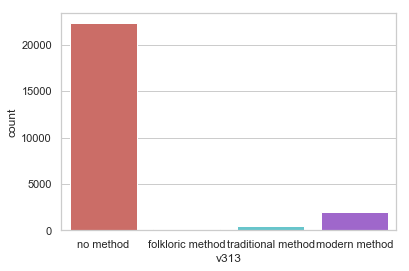

<Figure size 432x288 with 0 Axes>

In [30]:
sns.countplot(x=Rural_data_only['v313'] , data=Rural_data_only, palette='hls')

plt.show()
plt.savefig('Contraceptive Use Distribution')

In [31]:
Rural_data_only['v130'].value_counts(normalize=True) * 100

islam              54.761042
other christian    35.515561
catholic            8.720860
other               0.531465
traditionalist      0.471071
Name: v130, dtype: float64

In [32]:
Rural_data_only['v024'].value_counts(normalize=True) * 100

north west       28.646777
north east       23.251600
north central    20.715062
south south      13.210130
south east        7.871321
south west        6.305109
Name: v024, dtype: float64

In [33]:
Rural_data_only['v106'].value_counts(normalize=True) * 100

no education    47.091034
secondary       31.489310
primary         16.253976
higher           5.165680
Name: v106, dtype: float64

In [34]:
Rural_data_only['v190'].value_counts(normalize=True) * 100

poorest    28.413254
poorer     28.155574
middle     22.269195
richer     13.954987
richest     7.206990
Name: v190, dtype: float64

In [35]:
Rural_data_only['v201'].value_counts(normalize=True) * 100

0     24.576237
2     11.313766
1     11.156742
3     10.178363
4      9.771712
5      8.608125
6      7.392197
7      5.805854
8      4.175222
9      2.874743
10     2.005073
11     1.143455
12     0.603938
13     0.269759
14     0.068446
15     0.036236
16     0.016105
17     0.004026
Name: v201, dtype: float64

In [36]:
Rural_data_only['v313'].value_counts(normalize=True) * 100

no method             89.853847
modern method          8.044450
traditional method     1.739341
folkloric method       0.362363
Name: v313, dtype: float64

In [37]:
Rural_data_only['v536'].value_counts(normalize=True) * 100

active in last 4 weeks                                    61.976084
not active in last 4 weeks - not postpartum abstinence    18.383863
never had sex                                             13.238314
not active in last 4 weeks - postpartum abstinence         6.401739
Name: v536, dtype: float64

In [38]:
Rural_data_only['v013'].value_counts(normalize=True) * 100

15-19    20.320490
25-29    17.389379
20-24    17.014937
30-34    13.789910
35-39    12.485405
40-44     9.803922
45-49     9.195958
Name: v013, dtype: float64

In [39]:
Contraceptive_Use_recode = {'v313': 
                            
                            {"no method": 'Not using modern method', 
                             "modern method": 'Using modern method' , 
                             "traditional method": 'Not using modern method',  
                             "folkloric method": 'Not using modern method'}
                            }

In [40]:
Rural_data_only.replace(Contraceptive_Use_recode, inplace=True)

In [41]:
Rural_data_only['v313'].value_counts(normalize=True) * 100

Not using modern method    91.95555
Using modern method         8.04445
Name: v313, dtype: float64

In [42]:
Rural_data_only['v313'].value_counts() 

Not using modern method    22839
Using modern method         1998
Name: v313, dtype: int64

In [44]:
Independent_recode_v130 =  {"v130":
                            
                            {"other christian": 'christians',  
                             "catholic": 'christians',  
                             "other": 'others',  
                             "traditionalist": 'others',  
                             "islam": 'muslim'}
                           }                                

In [45]:
Rural_data_only.replace(Independent_recode_v130, inplace=True)

In [46]:
Rural_data_only['v130'].value_counts(normalize=True) * 100

muslim        54.761042
christians    44.236421
others         1.002537
Name: v130, dtype: float64

In [47]:
Rural_data_only['v130'].value_counts()

muslim        13601
christians    10987
others          249
Name: v130, dtype: int64

In [34]:
# The proportion of respondents that are non muslims or christians is so significantly minut that we may consider eliminate them from the analysis after bivariate data visualizationn. we may consider eliminating it from the analysis if the majority of those in that group are are non modern contraceptive users 

In [48]:
Independent_recode_v190 = {
    
                 "v190": {"poorest": 'poor', 
                          "poorer": 'poor', 
                          "middle": 'Average', 
                          "richer": 'rich', 
                          "richest": 'rich'}
                          }                

In [49]:
Rural_data_only.replace(Independent_recode_v190, inplace=True)

In [50]:
Rural_data_only['v190'].value_counts(normalize=True) * 100

poor       56.568829
Average    22.269195
rich       21.161976
Name: v190, dtype: float64

In [51]:
Independent_recode_v106 = {
                           
                  "v106": {"secondary": 'secondary/higher',
                           "higher":'secondary/higher'}   
                          }                                

In [52]:
Rural_data_only.replace(Independent_recode_v106, inplace=True)

In [53]:
Rural_data_only['v106'].value_counts(normalize=True) * 100

no education        47.091034
secondary/higher    36.654991
primary             16.253976
Name: v106, dtype: float64

In [54]:
Rural_data_only['v106'].value_counts() 

no education        11696
secondary/higher     9104
primary              4037
Name: v106, dtype: int64

In [55]:
   Independent_recode_v536 = { 
       
                         "v536": {"not active in last 4 weeks - postpartum abstinence": 'not active in last 4 weeks', 
                                  "not active in last 4 weeks - not postpartum abstinence": 'not active in last 4 weeks'}
                             }

In [56]:
Rural_data_only.replace(Independent_recode_v536, inplace=True)

In [57]:
Rural_data_only['v536'].value_counts(normalize=True) * 100

active in last 4 weeks        61.976084
not active in last 4 weeks    24.785602
never had sex                 13.238314
Name: v536, dtype: float64

In [58]:
Independent_v201 = {
                "v201": {0: '0',  1: '1-5',  2: '1-5',  3:'1-5',  
                         4: '1-5', 5: '1-5', 6: '6', 7: '7+',  
                         8: '7+',  9: '7+',  10: '7+',  11: '7+',  
                         12: '7+',  13: '7+',  14: '7+',  15: '7+',  
                         16: '7+', 17: '7+'}
                    }

In [59]:
Rural_data_only.replace(Independent_v201, inplace=True)

In [60]:
Rural_data_only['v201'].value_counts(normalize=True) * 100

1-5    51.028707
0      24.576237
7+     17.002859
6       7.392197
Name: v201, dtype: float64

In [61]:
Rural_data_only['v201'].value_counts() 

1-5    12674
0       6104
7+      4223
6       1836
Name: v201, dtype: int64

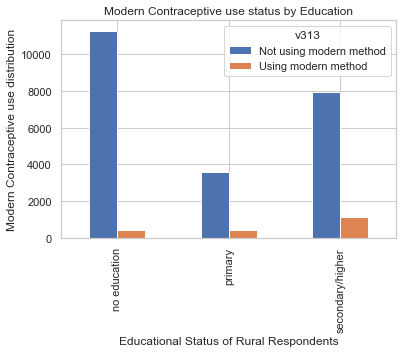

In [62]:
pd.crosstab(Rural_data_only.v106, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use status by Education')
plt.xlabel('Educational Status of Rural Respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptiveByEducation')

In [63]:
tab0=pd.crosstab(index=Rural_data_only.v106, columns=Rural_data_only.v313)
print('The two-way table between marital status and modern contraceptive use status is: \n' , tab0)

The two-way table between marital status and modern contraceptive use status is: 
 v313              Not using modern method  Using modern method
v106                                                          
no education                        11280                  416
primary                              3600                  437
secondary/higher                     7959                 1145


In [64]:
chi2, p, dof, expected=chi2_contingency(tab0.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 613.440,  p_value is 0.000


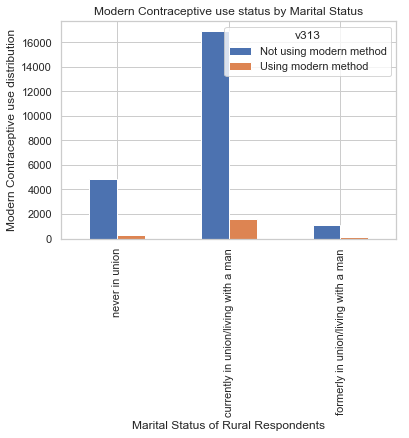

In [65]:
pd.crosstab(Rural_data_only.v502, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use status by Marital Status')
plt.xlabel('Marital Status of Rural Respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptiveByMaritalStatus')

In [66]:
tab1=pd.crosstab(index=Rural_data_only.v502, columns=Rural_data_only.v313)
print('The two-way table between marital status and modern contraceptive use status is: \n' , tab1)

The two-way table between marital status and modern contraceptive use status is: 
 v313                                  Not using modern method  \
v502                                                            
never in union                                           4871   
currently in union/living with a man                    16895   
formerly in union/living with a man                      1073   

v313                                  Using modern method  
v502                                                       
never in union                                        318  
currently in union/living with a man                 1590  
formerly in union/living with a man                    90  


In [67]:
chi2, p, dof, expected=chi2_contingency(tab1.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 33.657,  p_value is 0.000


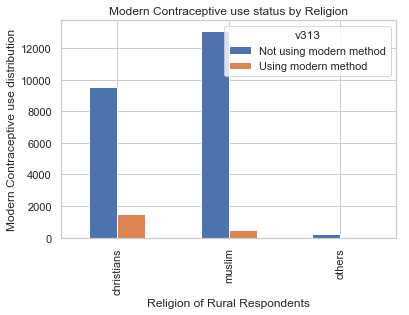

In [68]:
pd.crosstab(Rural_data_only.v130, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use status by Religion')
plt.xlabel('Religion of Rural Respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptiveByReligion')

In [69]:
tab2=pd.crosstab(index=Rural_data_only.v130, columns=Rural_data_only.v313)
print('The two-way table between religion and modern contraceptive use status is: \n' , tab2)

The two-way table between religion and modern contraceptive use status is: 
 v313        Not using modern method  Using modern method
v130                                                    
christians                     9503                 1484
muslim                        13094                  507
others                          242                    7


In [70]:
chi2, p, dof, expected=chi2_contingency(tab2.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 795.017,  p_value is 0.000


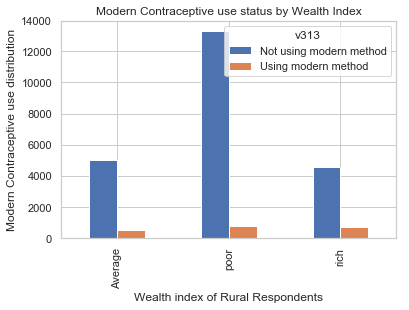

In [71]:
pd.crosstab(Rural_data_only.v190, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use status by Wealth Index')
plt.xlabel('Wealth index of Rural Respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptiveByWealthIndex')

In [72]:
tab3=pd.crosstab(index=Rural_data_only.v190, columns=Rural_data_only.v313)
print('The two-way table between wealth index and modern contraceptive use status is: \n' , tab3)

The two-way table between wealth index and modern contraceptive use status is: 
 v313     Not using modern method  Using modern method
v190                                                 
Average                     4988                  543
poor                       13303                  747
rich                        4548                  708


In [73]:
chi2, p, dof, expected=chi2_contingency(tab3.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 374.002,  p_value is 0.000


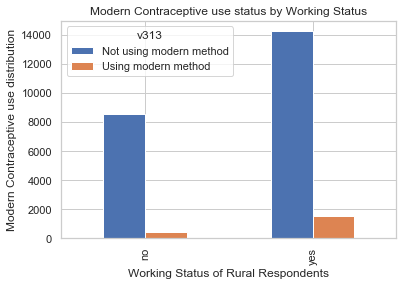

In [74]:
pd.crosstab(Rural_data_only.v714, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use status by Working Status')
plt.xlabel('Working Status of Rural Respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptiveByWorkingStatus')

In [75]:
tab4=pd.crosstab(index=Rural_data_only.v714, columns=Rural_data_only.v313)
print('The two-way table between working status and modern contraceptive use status is: \n' , tab4)

The two-way table between working status and modern contraceptive use status is: 
 v313  Not using modern method  Using modern method
v714                                              
no                       8585                  444
yes                     14254                 1554


In [76]:
chi2, p, dof, expected=chi2_contingency(tab4.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 186.850,  p_value is 0.000


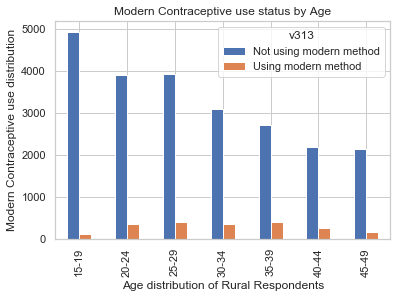

In [77]:
pd.crosstab(Rural_data_only.v013, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use status by Age')
plt.xlabel('Age distribution of Rural Respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptiveByAge')

In [78]:
tab5=pd.crosstab(index=Rural_data_only.v013, columns=Rural_data_only.v313)
print('The two-way table between working status and modern contraceptive use status is: \n' , tab5)

The two-way table between working status and modern contraceptive use status is: 
 v313   Not using modern method  Using modern method
v013                                               
15-19                     4931                  116
20-24                     3885                  341
25-29                     3919                  400
30-34                     3081                  344
35-39                     2714                  387
40-44                     2174                  261
45-49                     2135                  149


In [79]:
chi2, p, dof, expected=chi2_contingency(tab5.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 365.577,  p_value is 0.000


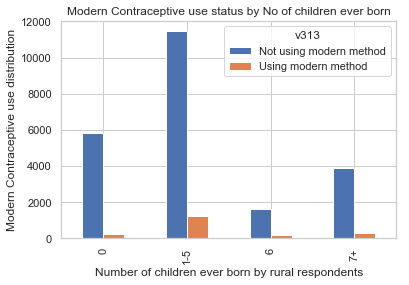

In [80]:
pd.crosstab(Rural_data_only.v201, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use status by No of children ever born')
plt.xlabel('Number of children ever born by rural respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptiveByMaritalStatus')

In [81]:
tab6=pd.crosstab(index=Rural_data_only.v201, columns=Rural_data_only.v313)
print('The two-way table between working status and modern contraceptive use status is: \n' , tab6)

The two-way table between working status and modern contraceptive use status is: 
 v313  Not using modern method  Using modern method
v201                                              
0                        5842                  262
1-5                     11454                 1220
6                        1640                  196
7+                       3903                  320


In [82]:
chi2, p, dof, expected=chi2_contingency(tab6.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 177.454,  p_value is 0.000


In [ ]:
# List of variables after feature engineering are:
# 1.v024 *
# 3.v502  *
# 4.v106 *
# 5.v130 *
# 6.v190 *
# 7.v313 *
# 8.v714 *
 //for stratifying the sample into rural-urban, and dropping the urban sample from the analysis 
# 10.v013 *
# 11.v201 *
# 12.v536 * 





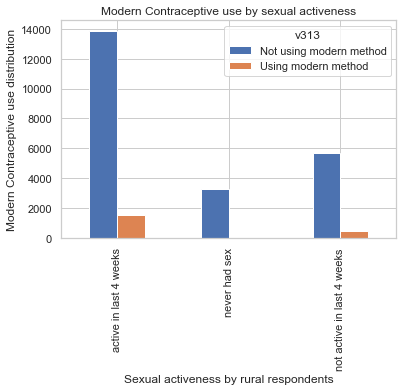

In [83]:
pd.crosstab(Rural_data_only.v536, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use by sexual activeness')
plt.xlabel('Sexual activeness by rural respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptive Use by sexual activeness')

In [84]:
tab7=pd.crosstab(index=Rural_data_only.v536, columns=Rural_data_only.v313)
print('The two-way table between working status and modern contraceptive use status is: \n' , tab7)

The two-way table between working status and modern contraceptive use status is: 
 v313                        Not using modern method  Using modern method
v536                                                                    
active in last 4 weeks                        13877                 1516
never had sex                                  3286                    2
not active in last 4 weeks                     5676                  480


In [85]:
chi2, p, dof, expected=chi2_contingency(tab7.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 351.550,  p_value is 0.000


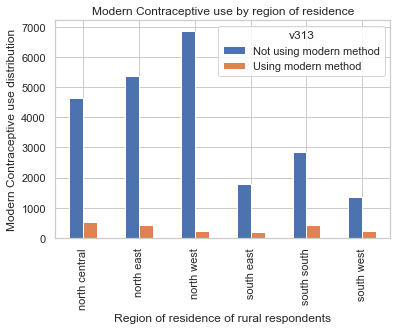

In [86]:
pd.crosstab(Rural_data_only.v024, Rural_data_only.v313).plot(kind='bar')
plt.title('Modern Contraceptive use by region of residence')
plt.xlabel('Region of residence of rural respondents')
plt.ylabel('Modern Contraceptive use distribution')
plt.savefig('ModernContraceptive Use by region')

In [87]:
tab8=pd.crosstab(index=Rural_data_only.v024, columns=Rural_data_only.v313)
print('The two-way table between working status and modern contraceptive use status is: \n' , tab8)

The two-way table between working status and modern contraceptive use status is: 
 v313           Not using modern method  Using modern method
v024                                                       
north central                     4633                  512
north east                        5356                  419
north west                        6877                  238
south east                        1772                  183
south south                       2864                  417
south west                        1337                  229


In [88]:
chi2, p, dof, expected=chi2_contingency(tab8.values)
print('Chi-square statistic is %0.3f,  p_value is %0.3f' %(chi2,p))

Chi-square statistic is 435.299,  p_value is 0.000


In [75]:
# As part of data prepreprocessing, our next step is to check for missing values for each of the variable (i.e each column) 

In [89]:
Rural_data_only.isnull().sum() #count number of missing values for each of the features or variables

v024    0
v130    0
v502    0
v106    0
v190    0
v201    0
v536    0
v013    0
v714    0
v313    0
dtype: int64

In [ ]:
# As can be seen, none of the features has a missing cases, so we will not do anything else based on our missing

In [ ]:
# Next: We want to dummy code our features since they are all categorical, hence not in numerical form. 

In [424]:
Create_dummies=pd.get_dummies(Rural_data_only)
Concat_Rural_data_only=pd.concat([Rural_data_only, Create_dummies], sort=False)
Concat_Rural_data_only.columns.values

array(['v024', 'v130', 'v502', 'v106', 'v190', 'v201', 'v536', 'v013',
       'v714', 'v313', 'v024_north central', 'v024_north east',
       'v024_north west', 'v024_south east', 'v024_south south',
       'v024_south west', 'v130_christians', 'v130_muslim', 'v130_others',
       'v502_never in union', 'v502_currently in union/living with a man',
       'v502_formerly in union/living with a man', 'v106_no education',
       'v106_primary', 'v106_secondary/higher', 'v190_Average',
       'v190_poor', 'v190_rich', 'v201_0', 'v201_1-5', 'v201_6',
       'v201_7+', 'v536_active in last 4 weeks', 'v536_never had sex',
       'v536_not active in last 4 weeks', 'v013_15-19', 'v013_20-24',
       'v013_25-29', 'v013_30-34', 'v013_35-39', 'v013_40-44',
       'v013_45-49', 'v714_no', 'v714_yes',
       'v313_Not using modern method', 'v313_Using modern method'],
      dtype=object)

In [425]:
Concat_Rural_data_only=Concat_Rural_data_only.drop(['v130', 'v502', 'v024', 'v106', 'v190', 'v201', 'v536', 
                                                    'v013', 'v714', 'v313', 'v313_Not using modern method'], axis=1)
Concat_Rural_data_only.fillna
Concat_Rural_data_only = Concat_Rural_data_only.dropna()
Concat_Rural_data_only.dtypes
Concat_Rural_data_only=Concat_Rural_data_only.astype(int)
Concat_Rural_data_only.dtypes
Concat_Rural_data_only.columns.values

array(['v024_north central', 'v024_north east', 'v024_north west',
       'v024_south east', 'v024_south south', 'v024_south west',
       'v130_christians', 'v130_muslim', 'v130_others',
       'v502_never in union', 'v502_currently in union/living with a man',
       'v502_formerly in union/living with a man', 'v106_no education',
       'v106_primary', 'v106_secondary/higher', 'v190_Average',
       'v190_poor', 'v190_rich', 'v201_0', 'v201_1-5', 'v201_6',
       'v201_7+', 'v536_active in last 4 weeks', 'v536_never had sex',
       'v536_not active in last 4 weeks', 'v013_15-19', 'v013_20-24',
       'v013_25-29', 'v013_30-34', 'v013_35-39', 'v013_40-44',
       'v013_45-49', 'v714_no', 'v714_yes', 'v313_Using modern method'],
      dtype=object)

In [426]:
X=Concat_Rural_data_only.drop('v313_Using modern method',axis=1)
y=Concat_Rural_data_only['v313_Using modern method']
y=y.to_frame()

In [427]:
os = SMOTE(random_state=0, ratio='auto')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
X_train.columns.values
y_train.columns.values
os_data_X,os_data_y=os.fit_sample(X_train,y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
print("length of oversampled data is ",len(os_data_X))
print("Number of non modern contraceptive users in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of modern contraceptive users in the oversampled data",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non modern contraceptive users data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of modern contraceptive users data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  32034
Number of non modern contraceptive users in oversampled data 16017
Number of modern contraceptive users in the oversampled data 16017
Proportion of non modern contraceptive users data in oversampled data is  0.5
Proportion of modern contraceptive users data in oversampled data is  0.5


In [428]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
X.columns.values

[False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True]
[ 6  7  2  3  5  4 12 11 10 15 14 13  1  1  1  1  1  1  1  1  1  1  9  1
  8  1  1  1  1  1  1  1  1  1]


array(['v024_north central', 'v024_north east', 'v024_north west',
       'v024_south east', 'v024_south south', 'v024_south west',
       'v130_christians', 'v130_muslim', 'v130_others',
       'v502_never in union', 'v502_currently in union/living with a man',
       'v502_formerly in union/living with a man', 'v106_no education',
       'v106_primary', 'v106_secondary/higher', 'v190_Average',
       'v190_poor', 'v190_rich', 'v201_0', 'v201_1-5', 'v201_6',
       'v201_7+', 'v536_active in last 4 weeks', 'v536_never had sex',
       'v536_not active in last 4 weeks', 'v013_15-19', 'v013_20-24',
       'v013_25-29', 'v013_30-34', 'v013_35-39', 'v013_40-44',
       'v013_45-49', 'v714_no', 'v714_yes'], dtype=object)

In [429]:
# summarize all features
for i in range(X.shape[1]):
    print('column_no:',i,X.columns[i],  (rfe.support_[i], rfe.ranking_[i]))

column_no: 0 v024_north central (False, 6)
column_no: 1 v024_north east (False, 7)
column_no: 2 v024_north west (False, 2)
column_no: 3 v024_south east (False, 3)
column_no: 4 v024_south south (False, 5)
column_no: 5 v024_south west (False, 4)
column_no: 6 v130_christians (False, 12)
column_no: 7 v130_muslim (False, 11)
column_no: 8 v130_others (False, 10)
column_no: 9 v502_never in union (False, 15)
column_no: 10 v502_currently in union/living with a man (False, 14)
column_no: 11 v502_formerly in union/living with a man (False, 13)
column_no: 12 v106_no education (True, 1)
column_no: 13 v106_primary (True, 1)
column_no: 14 v106_secondary/higher (True, 1)
column_no: 15 v190_Average (True, 1)
column_no: 16 v190_poor (True, 1)
column_no: 17 v190_rich (True, 1)
column_no: 18 v201_0 (True, 1)
column_no: 19 v201_1-5 (True, 1)
column_no: 20 v201_6 (True, 1)
column_no: 21 v201_7+ (True, 1)
column_no: 22 v536_active in last 4 weeks (False, 9)
column_no: 23 v536_never had sex (True, 1)
column_n

In [430]:
X=X.drop(['v024_north central', 'v024_north east', 'v024_north west','v024_south east', 'v024_south south', 'v024_south west', 'v130_christians', 'v130_muslim', 'v130_others','v502_never in union', 'v502_currently in union/living with a man','v502_formerly in union/living with a man','v536_active in last 4 weeks', 'v536_not active in last 4 weeks'], axis=1)

In [431]:
X=X.columns
X=os_data_X[X]
y=os_data_y['y']

In [432]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.542335
         Iterations 12
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.218     
Dependent Variable:    y                 AIC:               34786.3187
Date:                  2020-07-06 00:18  BIC:               34953.8098
No. Observations:      32034             Log-Likelihood:    -17373.   
Df Model:              19                LL-Null:           -22204.   
Df Residuals:          32014             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        12.0000                                        
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
v106_no education     -1.0759   0.0579 -18.5857 0.0000 -1.1894 -0.9624
v1

In [433]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [434]:
X=X.drop(['v106_primary','v201_0', 'v201_6'], axis=1)

In [435]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.542357
         Iterations 12
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.218     
Dependent Variable:    y                 AIC:               34781.7602
Date:                  2020-07-06 00:18  BIC:               34924.1276
No. Observations:      32034             Log-Likelihood:    -17374.   
Df Model:              16                LL-Null:           -22204.   
Df Residuals:          32017             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        12.0000                                        
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
v106_no education     -1.0584   0.0366 -28.9165 0.0000 -1.1302 -0.9867
v1

In [436]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [437]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3425 1330]
 [ 908 3948]]


              precision    recall  f1-score   support

           0       0.79      0.72      0.75      4755
           1       0.75      0.81      0.78      4856

   micro avg       0.77      0.77      0.77      9611
   macro avg       0.77      0.77      0.77      9611
weighted avg       0.77      0.77      0.77      9611



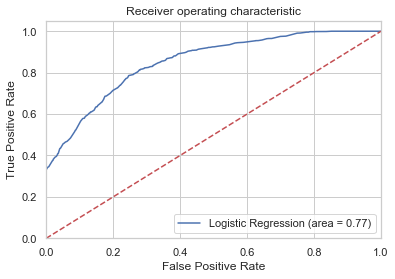

In [438]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()  

In [439]:
perm = PermutationImportance(logreg, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1335 ± 0.0115,v190_poor
0.1017 ± 0.0050,v714_no
0.0960 ± 0.0080,v106_no education
0.0641 ± 0.0038,v013_15-19
0.0592 ± 0.0067,v190_Average
0.0501 ± 0.0034,v013_20-24
0.0472 ± 0.0049,v013_25-29
0.0436 ± 0.0031,v714_yes
0.0422 ± 0.0055,v013_30-34
0.0386 ± 0.0022,v013_45-49


In [440]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

for scoring in["accuracy", "roc_auc"]:
    seed = 0
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
    results = model_selection.cross_val_score(logreg, X_test, y_test, cv=kfold, scoring=scoring)
    print("Model", scoring, " mean=", results.mean() , "stddev=", results.std())

Model accuracy  mean= 0.7686002539800667 stddev= 0.008732264443002478
Model roc_auc  mean= 0.8503179455602738 stddev= 0.010716391905924582


In [441]:
from sklearn.externals import joblib 
  
# Save the model as a pickle file 
joblib.dump(logreg, 'ModernContraceptiveUsePredictorModel.pkl')  

['ModernContraceptiveUsePredictorModel.pkl']